# 𝐃𝐚𝐭 𝐒𝐜𝐢𝐞𝐧𝐜𝐞 𝐏𝐫𝐨𝐣𝐞𝐜𝐭: Marketing Add challange


$\huge{𝐀𝐮𝐭𝐡𝐨𝐫: 𝐏𝐚𝐫𝐥𝐚𝐝 \ 𝐃𝐡𝐮𝐧𝐠𝐚𝐧𝐚}$

#        This project will predict who will most likely click on the AD.

Let's assume that you have a marketing campaign for which we spend 1000USD for acquiring one potential customer. For each customer that we target with our ad campaign and that clicks on the ad, we get an overall profit of 100USD. However, if we target a customer that ends up not clicking on the ad, we incur a net loss of 1000USD. Therefore, we can conclude that for each customer that was not targeted by the campaign and who clicks on the ad, we get an overall profit of 1100USD. How would you approach this problem?

In [1]:
# Importing librairies
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer, fbeta_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
%matplotlib inline 

# Defining categorical, numerical, and datetime variables that we will use later
categorical_vars = ["Ad Topic Line", "City", "Country"]
numerical_vars = ["Daily Time Spent on Site", "Area Income", "Daily Internet Usage", "Male", "log_age"]
datetime_vars = "Timestamp"
target = "Clicked on Ad"


In [2]:
#Loading Data
data = pd.read_csv("advertising_dsdj.csv")
#verifying loaded data
data.head()#printing five line from the top

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0.0


In [3]:
data.shape

(1018, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1018 non-null   float64
 1   Age                       1018 non-null   int64  
 2   Area Income               1018 non-null   float64
 3   Daily Internet Usage      1018 non-null   float64
 4   Ad Topic Line             1018 non-null   object 
 5   City                      1018 non-null   object 
 6   Male                      1018 non-null   int64  
 7   Country                   1018 non-null   object 
 8   Timestamp                 1018 non-null   object 
 9   Clicked on Ad             1014 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 79.7+ KB


In [5]:
data.isnull().any()#looking for the missing value in the data

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False
City                        False
Male                        False
Country                     False
Timestamp                   False
Clicked on Ad                True
dtype: bool

In [6]:
#checking null value in the data set
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               4
dtype: int64

In [7]:
data = data.dropna()#removing null value from the data
data.isnull().any()# checking is their still null value in the data

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False
City                        False
Male                        False
Country                     False
Timestamp                   False
Clicked on Ad               False
dtype: bool

In [8]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [9]:
data.shape

(1014, 10)

In [10]:
data.duplicated().any()# checking for any duplicates data in the dataset

True

In [11]:
print("Number of duplicated records in the data sets = ",data.duplicated().sum())

Number of duplicated records in the data sets =  7


In [12]:
#printing duplicate data
data[data.duplicated()]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
162,75.55,36,73234.87,159.24,Managed grid-enabled standardization,Ramirezside,0,Liechtenstein,2016-05-09 2:58,1.0
222,53.30,34,44893.71,111.94,Self-enabling optimal initiative,West Jessicahaven,0,Mauritania,2016-05-06 21:07,1.0
235,84.08,30,62336.39,187.36,Face-to-face intermediate approach,Carterburgh,1,Fiji,2016-01-13 2:58,0.0
923,87.18,31,58287.86,193.60,Right-sized logistical middleware,West Andrew,0,Madagascar,2016-01-31 5:12,0.0
924,87.18,31,58287.86,193.60,Right-sized logistical middleware,West Andrew,0,Madagascar,2016-01-31 5:12,0.0
925,87.18,31,58287.86,193.60,Right-sized logistical middleware,West Andrew,0,Madagascar,2016-01-31 5:12,0.0
944,72.55,22,58953.01,202.34,Balanced empowering success,New Cynthia,0,Bosnia and Herzegovina,2016-02-08 7:33,0.0


In [13]:
data = data.drop_duplicates()#removing duplicate data from the data set
data.duplicated().any()

False

In [14]:
data.shape

(1007, 10)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 0 to 1017
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1007 non-null   float64
 1   Age                       1007 non-null   int64  
 2   Area Income               1007 non-null   float64
 3   Daily Internet Usage      1007 non-null   float64
 4   Ad Topic Line             1007 non-null   object 
 5   City                      1007 non-null   object 
 6   Male                      1007 non-null   int64  
 7   Country                   1007 non-null   object 
 8   Timestamp                 1007 non-null   object 
 9   Clicked on Ad             1007 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 86.5+ KB


# Exploratory Data Analysis (EDA)

In [16]:
#extract Descriptive statistics
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,64.952403,36.958292,54899.398868,179.386514,0.482622,0.502483
std,15.850441,31.729539,13458.555374,44.548765,0.499946,0.500242
min,32.600000,-25.000000,13996.500000,23.640000,0.000000,0.000000
25%,51.270000,29.000000,46899.780000,138.490000,0.000000,0.000000
50%,68.100000,35.000000,56984.090000,182.200000,0.000000,1.000000
75%,78.535000,42.000000,65350.775000,218.550000,1.000000,1.000000
max,91.430000,999.000000,79484.800000,269.960000,1.000000,1.000000


We can observe something unusual in the age column wher the minimum age is -25 years and maximum age is too high 999 years.

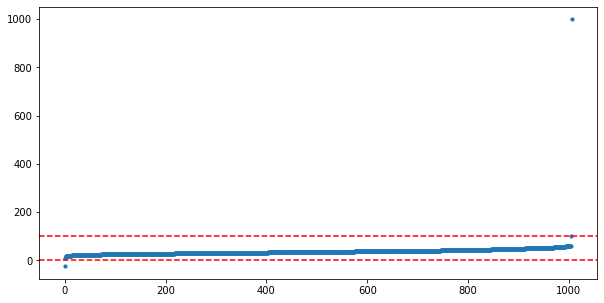

In [17]:
# sorting the age 
sorted_age = sorted(data["Age"])
index = [] #initaliging empty index
for i in range(len(sorted_age)):
    index.append(i)#adding the sorted age into the empty index
    
#Plotting sorted age against their index
x = index
y = sorted_age

plt.figure(figsize = (10, 5))# figure size
plt.scatter(x, y, s = 10)
plt.axhline(y = 0, linestyle = "--", color = "r")# adding horizontal line y = 0
plt.axhline(y = 100, linestyle = "--", color = "r")# adding horizontal line y = 100
#plt.show()

In [18]:
data[(data['Age'] > 100) | (data['Age'] < 18)]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
294,56.01,-25,46339.25,127.26,Re-engineered real-time success,Garciamouth,0,Tonga,2016-07-05 18:59,1.0
495,50.60,999,34191.13,129.88,Realigned reciprocal framework,New Daniellefort,1,United States of America,2016-05-03 12:57,1.0
604,57.20,103,57739.03,110.66,Innovative maximized groupware,East Heatherside,0,New Zealand,2016-03-19 11:09,1.0
823,43.16,8,25371.52,156.11,Implemented didactic support,Williamsport,1,Marshall Islands,2016-07-06 3:40,1.0


In [19]:
# Removing the extreme age values
data = data[(data['Age'] >= 18) & (data['Age'] < 100)]
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0.0


In [20]:
data.shape

(1003, 10)

To be able to work with thwe feature "Timestamp", we will transmorm it to datetime, a format that will allow calculation on it

In [21]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:00,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:00,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:00,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:00,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:00,0.0


Check out if the daliy time spent on site is smaller or equal to the daily internet use. For this we creat a variable 
"Delta". Dalta = Daily Internet Usage - Daily Time Spent on Site

In [22]:
# Let's check out if the 'Daily TIme Spend on Site' 
# is actually smaller or equal to the Daily Internet Usage'

data['delta'] = data['Daily Internet Usage'] - data['Daily Time Spent on Site']
data.head()
#sum(data['delta'] < 0)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,delta
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:00,0.0,187.14
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:00,0.0,113.54
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:00,0.0,167.03
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:00,0.0,171.74
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:00,0.0,157.21


In [23]:
invalid_dalta = data['delta']<0
invalid_dalta = data[invalid_dalta]
invalid_dalta



,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,delta
114,46.13,46,37838.72,23.64,Horizontal hybrid challenge,New Rachel,1,Guyana,2016-01-09 05:44:00,1.0,-22.49
331,86.78,30,54952.42,70.13,Fundamental zero tolerance solution,New Steve,1,United States of America,2016-02-18 23:08:00,0.0,-16.65
404,66.99,47,27262.51,24.44,Operative actuating installation,Lopezberg,1,Tanzania,2016-06-15 11:56:00,1.0,-42.55


In [24]:
# Removing rows with a delta smaller than zero
data = data[data['delta'] >= 0]

# I'll remove the column that I just created, but you could definitely keep it :-) 
data = data.drop('delta', axis=1)

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:00,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:00,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:00,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:00,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:00,0.0


In [25]:
data.shape

(1000, 10)

In [26]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Descriptive Figures

cross correlation  plot

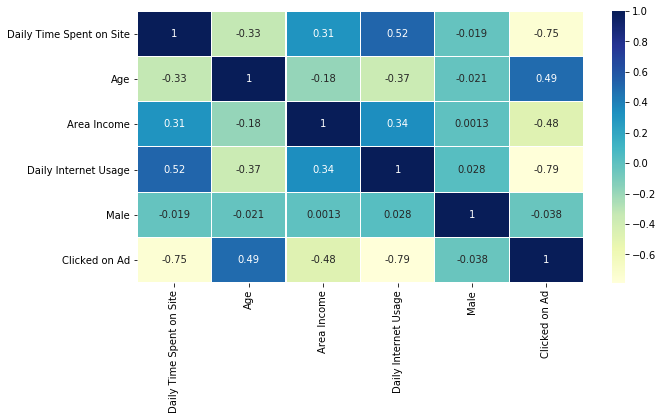

In [27]:
# Plot heatmap of all data with correlation coefficients visible
data_corr = data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(data_corr, cmap='YlGnBu', linewidth=.005, annot=True)

# Distribution Plots With Respect To Our Target Feature

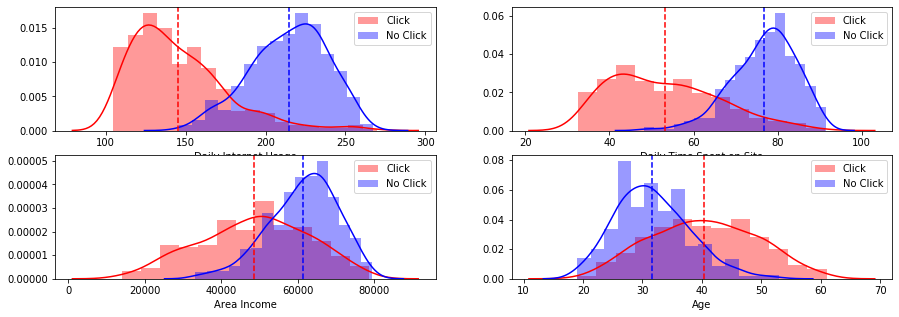

In [28]:
# Subsetting by clicks
click = data["Clicked on Ad"] == 1
no_click = data["Clicked on Ad"] == 0

# Creating the plots
features = ["Daily Internet Usage", "Daily Time Spent on Site", "Area Income", "Age"]
labels = ["Click", "No Click"]

def creating_plots(features, labels):
    plt.figure(figsize=(15,5))
    for feature in features:
        plt.subplot(2, 2, features.index(feature)+1)
        sns.distplot(data[feature][click], label=labels[0], color="r")
        sns.distplot(data[feature][no_click], label=labels[1], color="b")
        plt.axvline(data[feature][click].mean(), linestyle = '--', color="r")
        plt.axvline(data[feature][no_click].mean(), linestyle = '--', color="b")
        plt.legend()

creating_plots(features, labels)